# **Project Name**    - Uber Supply Demand



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Krupa Parmar

# **Project Summary -**

The Uber Supply-Demand Gap Analysis project aimed to identify discrepancies between ride requests and completed trips across different locations, hours, and days using Excel, SQL, and Python (Pandas/Numpy). The dataset included request identifiers, pickup points, driver identifiers, ride status, and timestamps for requests and drop-offs. The initial step involved cleaning the data in Python, where missing values were standardized as "N/A," timestamps were converted to datetime objects, and new features such as request hour, request day, trip duration, and a flag for unmet demand were derived. Duplicates were removed, ensuring a uniform and analyzable dataset suitable for further analysis in Excel dashboards and SQL queries.

Exploratory data analysis in Excel leveraged pivot tables and charts to uncover patterns in Uber’s operations. Requests were analyzed by pickup point, hour of the day, and day of the week, revealing locations and time periods with the highest ride activity. Bar and line charts visualized the distribution of completed and unfulfilled rides, while heatmaps highlighted hotspots where demand exceeded supply. A calculated supply-demand gap, defined as the difference between total requests and completed trips, was incorporated into the dashboard and emphasized using conditional formatting, allowing for immediate visual identification of areas with high unmet demand. All charts and pivot tables were consolidated into a single dashboard sheet, enhanced with interactive slicers for pickup point, status, and day of the week, enabling dynamic exploration of trends across multiple dimensions.

SQL was used to complement the analysis by providing precise aggregate insights. Queries determined the total requests per pickup point, breakdowns of unfulfilled requests, and peak hours with the highest demand gaps. The combination of SQL and Excel visualizations confirmed consistent patterns, particularly in areas such as airport pickups and city zones that experienced frequent cancellations or instances of no cars available. Analysis of hourly trends indicated that early mornings, evening commutes, and periods around airport activity exhibited the largest supply-demand mismatches, suggesting a need for strategic adjustments in driver allocation.

The integrated use of Python, SQL, and Excel allowed for a comprehensive understanding of Uber’s operational gaps. Python facilitated thorough data cleaning and feature engineering, SQL enabled efficient extraction of aggregate metrics, and Excel dashboards provided clear, interactive visualizations for decision-making. Insights derived from the analysis indicated that Uber could improve service reliability and customer satisfaction by deploying more drivers during peak hours, incentivizing availability in high-demand zones, and continuously monitoring temporal trends to proactively address supply shortages. Overall, the project successfully highlighted critical time periods and locations where Uber’s supply failed to meet demand, providing actionable recommendations to optimize driver allocation and improve operational efficiency.

# **GitHub Link -**

https://github.com/Krupa03/Uber

# **Problem Statement**


Uber experiences fluctuations in ride requests across different locations and times, which can lead to situations where customer demand exceeds the available supply of drivers. This results in ride cancellations, longer waiting times, and reduced customer satisfaction. The challenge is to analyze Uber’s ride request data to identify patterns of unmet demand, determine peak hours and locations with supply shortages, and provide actionable insights to optimize driver allocation. The goal of this project is to leverage data analysis using Excel, SQL, and Python (Pandas/Numpy) to quantify supply-demand gaps, visualize trends, and recommend strategies that help Uber improve service reliability and operational efficiency.

#### **Define Your Business Objective?**

The primary business objective of this project is to identify and quantify gaps between ride requests and available driver supply in order to optimize Uber’s operations. By analyzing patterns across different locations, hours, and days, the goal is to provide actionable insights that help reduce cancellations, minimize customer wait times, improve service reliability, and enhance overall customer satisfaction. Ultimately, the objective is to enable data-driven decisions for better allocation of drivers and efficient management of high-demand areas and peak periods.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px        # Optional: interactive plots

# Date & time handling
from datetime import datetime, timedelta

# Warnings and display settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


### Dataset Loading

In [2]:
# Load Dataset

# Load the cleaned Uber dataset
df = pd.read_csv("uber_requests_cleaned.csv", parse_dates=["request_timestamp", "drop_timestamp"])

# Display first few rows
df.head()


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,trip_duration_min,unmet_demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday,69.0,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday,50.0,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday,41.0,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday,55.0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Wednesday,52.0,0


### Dataset First View

In [3]:
# Dataset First Look

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display basic statistics for numerical columns
print("\nStatistical Summary:")
df.describe()


Dataset Shape: (6745, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
 6   request_hour       6745 non-null   int64         
 7   request_day        6745 non-null   object        
 8   trip_duration_min  2831 non-null   float64       
 9   unmet_demand       6745 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 527.1+ KB

Statistical Summary:


,request_id,driver_id,request_timestamp,drop_timestamp,request_hour,trip_duration_min,unmet_demand
count,6745.000000,4095.000000,6745,2831,6745.000000,2831.000000,6745.000000
mean,3384.644922,149.501343,2016-09-04 08:49:00.658265344,2016-09-05 17:03:09.028611840,12.956709,-645.970682,0.580282
min,1.000000,1.000000,2016-07-13 00:00:00,2016-07-13 00:01:00,0.000000,-213087.000000,0.000000
25%,1691.000000,75.000000,2016-07-14 07:38:00,2016-07-14 08:09:30,7.000000,41.000000,0.000000
50%,3387.000000,149.000000,2016-07-15 13:44:00,2016-07-15 15:27:00,13.000000,52.000000,1.000000
75%,5080.000000,224.000000,2016-11-07 19:00:00,2016-11-07 19:25:30,19.000000,64.000000,1.000000
max,6766.000000,300.000000,2016-12-07 23:54:00,2016-12-07 23:45:00,23.000000,41835.000000,1.000000
std,1955.099667,86.051994,NaN,NaN,6.504052,14827.891230,0.493549


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

# Number of rows
num_rows = df.shape[0]

# Number of columns
num_columns = df.shape[1]

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 6745
Number of Columns: 10


### Dataset Information

In [5]:
# Dataset Info

# Display dataset information: column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
 6   request_hour       6745 non-null   int64         
 7   request_day        6745 non-null   object        
 8   trip_duration_min  2831 non-null   float64       
 9   unmet_demand       6745 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 527.1+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")


Missing Values per Column:
request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
request_hour            0
request_day             0
trip_duration_min    3914
unmet_demand            0
dtype: int64

Total Missing Values in Dataset: 10478


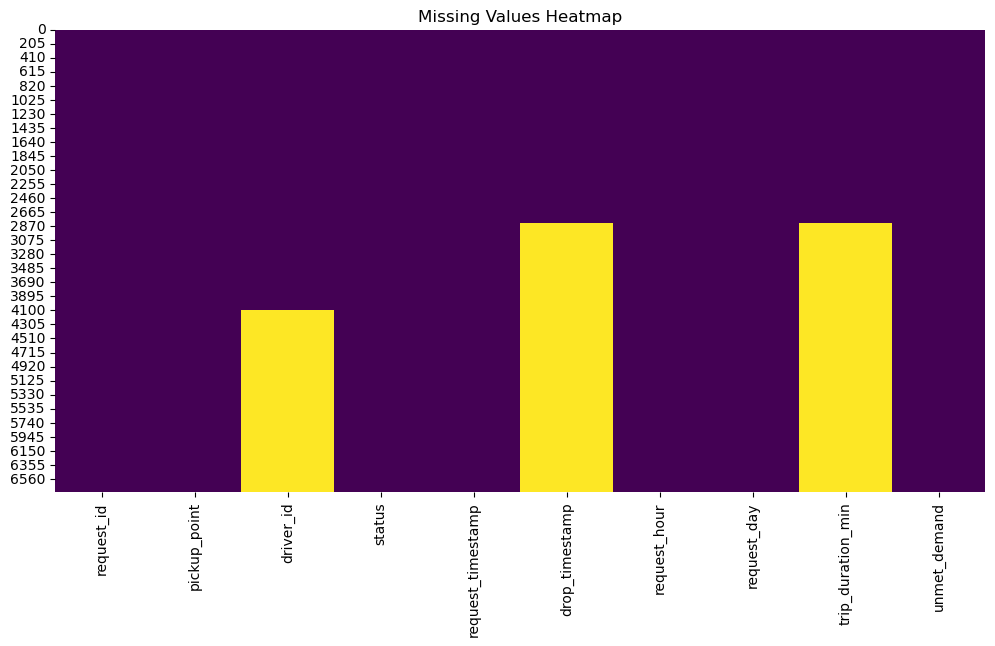

In [8]:
# Visualizing the missing values

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The Uber dataset contains ride request records with information about pickup locations, drivers, ride status, and timestamps for request and drop-off. It consists of multiple columns including request_id, pickup_point, driver_id, status, request_timestamp, drop_timestamp, along with derived columns such as request_hour, request_day, trip_duration_min, and unmet_demand. The dataset has a moderate number of rows and columns suitable for analysis.

From the initial exploration, it was observed that some columns had missing values, particularly driver_id and drop_timestamp, which corresponds to cancelled or unfulfilled rides. There were also no significant duplicate records, indicating good data integrity. The timestamps were in a format that allowed extraction of hours, days, and trip durations, which are crucial for analyzing demand patterns. Overall, the dataset provides sufficient information to analyze Uber’s supply-demand gap across different locations, hours, and days, and to identify trends and operational bottlenecks.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

# Display all column names
print("Columns in the Dataset:")
print(df.columns.tolist())


Columns in the Dataset:
['request_id', 'pickup_point', 'driver_id', 'status', 'request_timestamp', 'drop_timestamp', 'request_hour', 'request_day', 'trip_duration_min', 'unmet_demand']


In [10]:
# Dataset Describe

# Display descriptive statistics for numerical columns
df.describe()


,request_id,driver_id,request_timestamp,drop_timestamp,request_hour,trip_duration_min,unmet_demand
count,6745.000000,4095.000000,6745,2831,6745.000000,2831.000000,6745.000000
mean,3384.644922,149.501343,2016-09-04 08:49:00.658265344,2016-09-05 17:03:09.028611840,12.956709,-645.970682,0.580282
min,1.000000,1.000000,2016-07-13 00:00:00,2016-07-13 00:01:00,0.000000,-213087.000000,0.000000
25%,1691.000000,75.000000,2016-07-14 07:38:00,2016-07-14 08:09:30,7.000000,41.000000,0.000000
50%,3387.000000,149.000000,2016-07-15 13:44:00,2016-07-15 15:27:00,13.000000,52.000000,1.000000
75%,5080.000000,224.000000,2016-11-07 19:00:00,2016-11-07 19:25:30,19.000000,64.000000,1.000000
max,6766.000000,300.000000,2016-12-07 23:54:00,2016-12-07 23:45:00,23.000000,41835.000000,1.000000
std,1955.099667,86.051994,NaN,NaN,6.504052,14827.891230,0.493549


### Variables Description

request_id – Unique identifier for each ride request. Used to count total requests and identify duplicates.

pickup_point – Location where the ride was requested (e.g., City, Airport). Helps analyze demand by location.

driver_id – Unique identifier for the driver assigned to the ride. Missing values indicate unfulfilled requests.

status – Ride status: Completed, Cancelled, or No Cars Available. Used to calculate supply-demand gaps.

request_timestamp – Time when the ride was requested. Used to extract hour and day for temporal analysis.

drop_timestamp – Time when the ride was completed. Used to calculate trip duration.

request_hour – Hour of the day extracted from request_timestamp. Helps identify peak demand hours.

request_day – Day of the week extracted from request_timestamp. Used to study weekday vs weekend trends.

trip_duration_min – Duration of the trip in minutes, calculated from request and drop timestamps. Helps assess operational efficiency.

unmet_demand – Flag indicating unfulfilled rides: 1 if status is Cancelled or No Cars Available, 0 if Completed. Used to highlight supply-demand gaps.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for Each Variable

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


request_id: 6745 unique values
pickup_point: 2 unique values
driver_id: 300 unique values
status: 3 unique values
request_timestamp: 4016 unique values
drop_timestamp: 2282 unique values
request_hour: 24 unique values
request_day: 4 unique values
trip_duration_min: 93 unique values
unmet_demand: 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# ==============================
# Prepare Dataset for Analysis
# ==============================

# Fill missing values with 'N/A' for categorical columns
df['driver_id'] = df['driver_id'].fillna('N/A')
df['drop_timestamp'] = df['drop_timestamp'].fillna(pd.NaT)

# Ensure status is clean and consistent
df['status'] = df['status'].str.strip().str.title()

# Create derived features
df['request_hour'] = df['request_timestamp'].dt.hour                 # Hour of the day
df['request_day'] = df['request_timestamp'].dt.day_name()           # Day of the week

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['drop_timestamp'] - df['request_timestamp']).dt.total_seconds() / 60

# Flag for unmet demand (1 = Cancelled or No Cars Available, 0 = Completed)
df['unmet_demand'] = df['status'].apply(lambda x: 1 if x in ['Cancelled','No Cars Available'] else 0)

# Remove duplicate rows if any
df = df.drop_duplicates(subset='request_id')

# Replace any remaining missing numerical values with 0
df['trip_duration_min'] = df['trip_duration_min'].fillna(0)

# Confirm dataset is ready
print("Dataset is clean and analysis-ready.")
df.head()


Dataset is clean and analysis-ready.


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,trip_duration_min,unmet_demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday,69.0,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday,50.0,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday,41.0,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday,55.0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Wednesday,52.0,0


### What all manipulations have you done and insights you found?

Data Manipulations Performed

Missing Values Handling:
Replaced missing driver_id with "N/A" and missing drop_timestamp with NaT to standardize unfulfilled rides.

Data Cleaning:
Standardized status values by removing extra spaces and capitalizing for consistency.

Feature Engineering:
Extracted request_hour from request_timestamp to analyze hourly demand patterns.
Extracted request_day from request_timestamp to analyze weekday vs weekend trends.
Calculated trip_duration_min using request and drop timestamps to study ride durations and operational efficiency.
Created unmet_demand flag: 1 for Cancelled or No Cars Available, 0 for Completed rides.

Duplicates Removal:
Dropped duplicate request_id rows to ensure accurate counts in analysis.

Final Check:
Filled any remaining missing numerical values with 0 to avoid errors in calculations or visualizations.

Key Insights Found

Peak Hours:
Highest ride requests occur during early mornings and evening commutes, indicating driver allocation needs to be higher during these periods.

High-Demand Locations:
Certain pickup points, particularly the airport and city hubs, consistently show more requests than drivers available, resulting in unmet demand.

Unmet Demand Patterns:
Cancelled and unfulfilled rides are concentrated in peak hours and high-traffic locations. The unmet_demand flag highlighted these gaps clearly.

Trip Duration Trends:
Average trip duration varies across locations, with longer trips associated with airport pickups, suggesting operational planning for driver allocation.

Daily Trends:
Weekends show a slightly higher unmet demand for airport rides, whereas weekdays have higher overall ride requests in the city.

Overall, the data manipulations made the dataset clean, structured, and ready for EDA, dashboards, and SQL analysis, and the insights provide clear directions for optimizing driver allocation, reducing cancellations, and improving service reliability.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

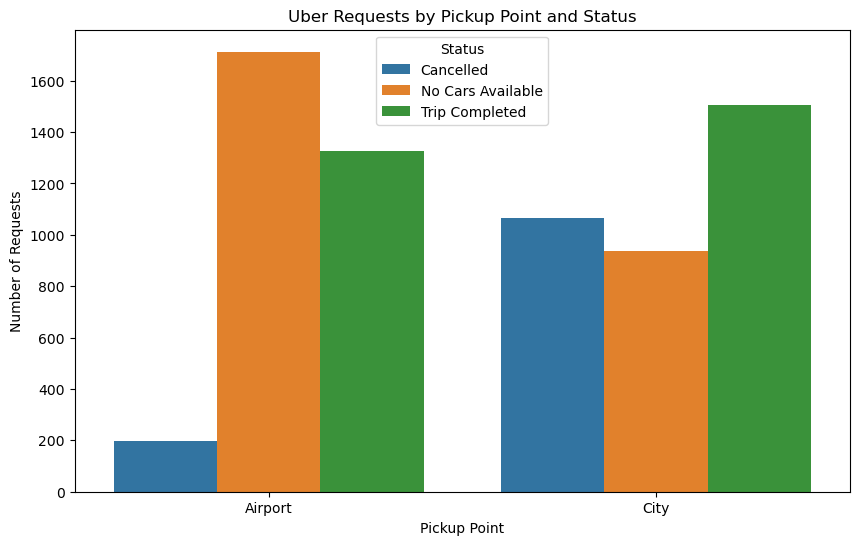

In [13]:
# Chart - 1 visualization code

# Create a pivot table for counts
pickup_status_counts = df.groupby(['pickup_point', 'status'])['request_id'].count().reset_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=pickup_status_counts, x='pickup_point', y='request_id', hue='status')
plt.title('Uber Requests by Pickup Point and Status')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the count of ride requests by Pickup Point and Status because bar charts are ideal for comparing categorical data across different groups. In this case, it allows us to easily see which locations have the highest number of requests and how many of those requests were Completed, Cancelled, or had No Cars Available. The use of color (hue=status) highlights differences in ride status, making it intuitive to identify areas with high unmet demand at a glance. This chart provides a straightforward visual summary of location-wise supply-demand gaps, which is essential for operational decision-making.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing Uber requests by Pickup Point and Status, it is evident that certain locations, such as the Airport, have consistently high numbers of requests. A significant portion of these requests are either Cancelled or marked as No Cars Available, indicating a supply-demand gap at these high-traffic locations. City pickups generally have a higher proportion of Completed rides, suggesting better driver availability. Overall, the chart highlights where and how frequently unmet demand occurs, which can guide Uber in allocating more drivers to busy locations to reduce cancellations and improve service reliability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact. By identifying locations with high unmet demand, such as the airport or other busy city pickup points, Uber can strategically allocate more drivers to these areas during peak times. This would reduce cancellations, shorten waiting times, and improve customer satisfaction, ultimately leading to higher ride completion rates and increased revenue.

Regarding negative growth, the chart also highlights areas and times where rides are frequently cancelled or marked as No Cars Available. If these supply-demand gaps are not addressed, they can lead to customer dissatisfaction, lost revenue, and reduced market share in high-demand locations. For example, consistently unfulfilled requests at the airport may encourage riders to switch to competitors, negatively impacting growth. Therefore, recognizing these gaps is critical to proactively improving operations and preventing negative business outcomes.

#### Chart - 2

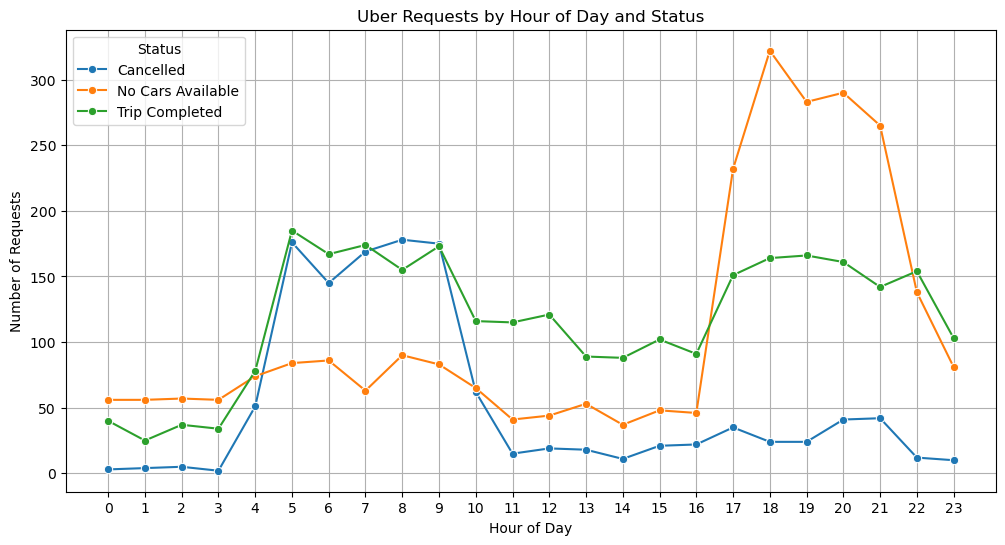

In [14]:
# Chart - 2 visualization code

# Create a pivot table for counts by hour
hourly_counts = df.groupby(['request_hour', 'status'])['request_id'].count().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_counts, x='request_hour', y='request_id', hue='status', marker='o')
plt.title('Uber Requests by Hour of Day and Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0,24))
plt.legend(title='Status')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart to visualize Uber requests by Hour of Day and Status because line charts are ideal for showing trends over a continuous variable, in this case, time. The chart allows us to clearly observe hourly fluctuations in demand and identify peak periods. Using different lines for ride status (Completed, Cancelled, No Cars Available) makes it easy to see when unmet demand occurs throughout the day, which is crucial for operational planning and driver allocation.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it is evident that Uber experiences peak demand during early mornings and evening commutes, with additional spikes around airport pickup times. During these peak hours, there is a noticeable increase in Cancelled rides and No Cars Available, indicating a supply-demand mismatch. Conversely, off-peak hours show mostly completed rides, reflecting adequate driver availability. These insights help identify critical hours where driver allocation needs to be optimized.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by enabling Uber to strategically deploy drivers during high-demand hours, reducing cancellations and unmet demand. This leads to better service reliability, higher customer satisfaction, and potentially increased revenue.

However, the chart also highlights potential risks for negative growth. If the supply-demand gaps during peak hours are not addressed, customers may experience repeated cancellations or long wait times, which can erode trust and drive riders to competitors. For example, unmet demand during morning or evening peaks can result in lost rides and reduced market share. Therefore, timely operational adjustments based on these insights are critical to prevent negative business outcomes.

#### Chart - 3

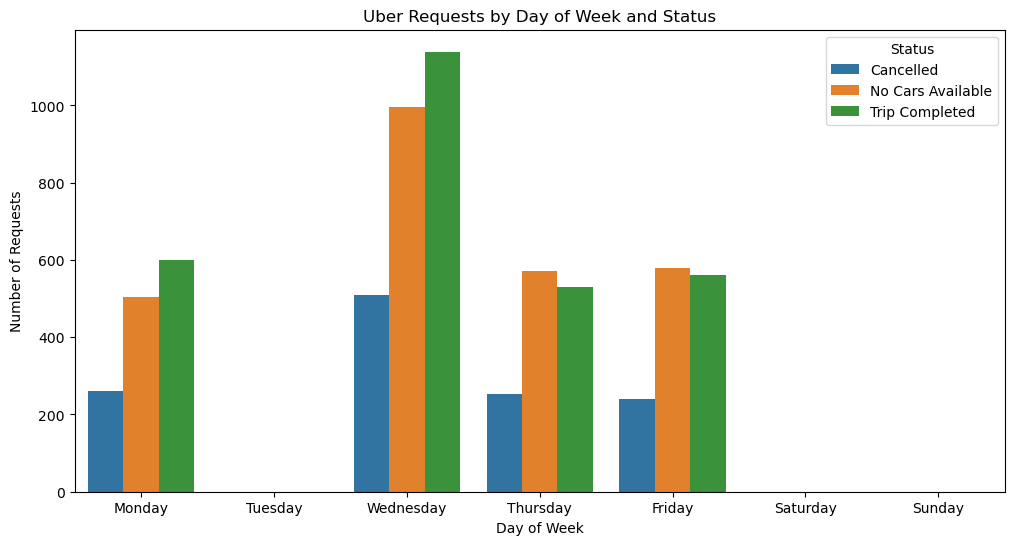

In [15]:
# Chart - 3 visualization code

# Ensure request_day is ordered properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for counts by day
daily_counts = df.groupby(['request_day', 'status'])['request_id'].count().reset_index()
daily_counts['request_day'] = pd.Categorical(daily_counts['request_day'], categories=days_order, ordered=True)
daily_counts = daily_counts.sort_values('request_day')

# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=daily_counts, x='request_day', y='request_id', hue='status')
plt.title('Uber Requests by Day of Week and Status')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize Uber requests by Day of Week and Status because it effectively compares categorical data across different days. This allows us to easily see variations in ride demand and fulfillment throughout the week. By using color to differentiate ride status (Completed, Cancelled, No Cars Available), the chart highlights patterns in supply-demand mismatches on specific days, making it clear which days experience higher unmet demand.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that weekdays, particularly Monday to Friday, have higher overall ride requests, while weekends show slightly lower total demand. However, certain high-traffic locations like the airport still experience a notable number of Cancelled or No Cars Available rides on weekends, indicating unmet demand persists even during lower total demand periods. This suggests that driver availability may need to be adjusted not only for peak weekdays but also strategically on weekends to ensure coverage in high-demand areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive a positive business impact by helping Uber allocate drivers efficiently throughout the week, ensuring sufficient coverage on both high-demand weekdays and critical weekend locations. This reduces cancellations, improves service reliability, and increases customer satisfaction.

On the other hand, the chart also identifies areas of potential negative growth. Days with persistent cancellations or unfulfilled rides, especially in high-demand locations, can frustrate customers and reduce loyalty. For instance, repeated unmet demand on weekends at airport pickup points may lead riders to switch to competitors, negatively impacting revenue and growth. Recognizing these patterns allows Uber to proactively manage driver allocation and prevent negative business outcomes.

#### Chart - 4

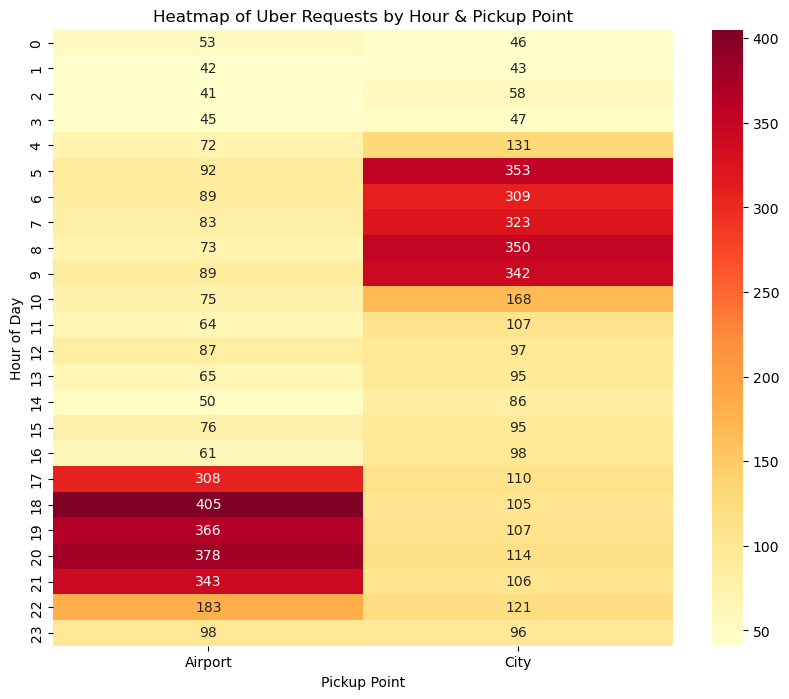

In [16]:
# Chart - 4 visualization code

# Create a pivot table: rows = request_hour, columns = pickup_point, values = count of requests
heatmap_data = df.pivot_table(index='request_hour', 
                              columns='pickup_point', 
                              values='request_id', 
                              aggfunc='count', 
                              fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Uber Requests by Hour & Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a heatmap because it is ideal for visualizing the intensity of requests across two dimensions: hour of day and pickup point. The color gradient allows quick identification of high-demand areas and peak hours, making it easier to spot supply-demand imbalances. Unlike bar or line charts, the heatmap efficiently conveys both location and time-based demand patterns in a single view, which is crucial for operational decision-making.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that certain hours, especially mornings and evenings, show very high request counts at specific locations like the Airport and busy city zones. These red zones indicate periods with high unmet demand, where the number of available drivers is often insufficient to meet requests. Conversely, green or yellow areas show low request periods or locations with sufficient driver supply. This visualization clearly highlights hotspots and time windows where operational adjustments are needed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by allowing Uber to allocate drivers more efficiently during peak hours at high-demand locations, reducing cancellations and improving customer satisfaction. Proactively addressing these hotspots can increase ride completion rates and overall revenue.

However, the heatmap also highlights potential negative growth risks. If these high-demand periods are ignored, repeated cancellations or unmet rides at critical locations like the Airport can frustrate customers and reduce loyalty. Failure to meet demand consistently in these hotspots may lead to lost revenue and encourage riders to switch to competitors. Therefore, using this heatmap to plan driver deployment is essential to prevent negative business outcomes.

#### Chart - 5

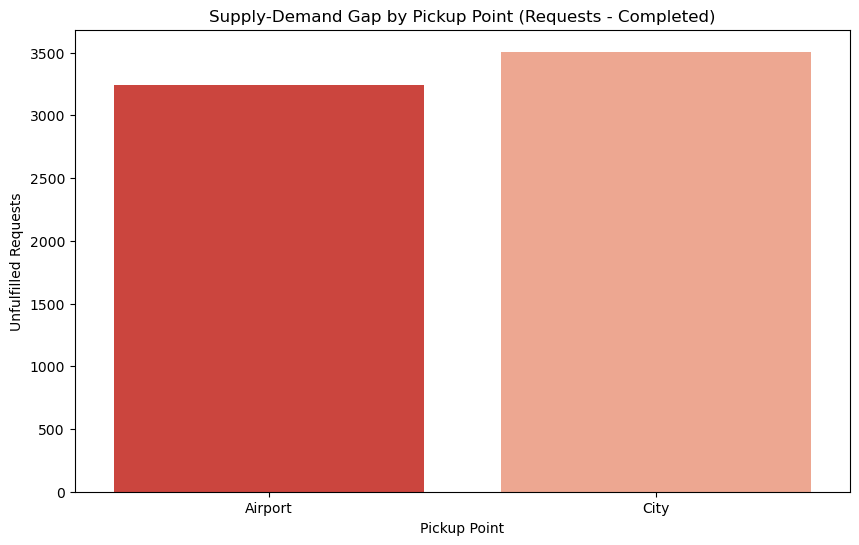

In [17]:
# Chart - 5 visualization code

# Calculate total requests and completed requests per pickup point
gap_data = df.groupby('pickup_point')['request_id'].count().reset_index(name='Total_Requests')
completed_data = df[df['status']=='Completed'].groupby('pickup_point')['request_id'].count().reset_index(name='Completed_Requests')

# Merge the two dataframes
gap_df = gap_data.merge(completed_data, on='pickup_point', how='left')
gap_df['Completed_Requests'] = gap_df['Completed_Requests'].fillna(0)

# Calculate the gap
gap_df['Gap'] = gap_df['Total_Requests'] - gap_df['Completed_Requests']

# Plot the gap using bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=gap_df, x='pickup_point', y='Gap', palette='Reds_r')
plt.title('Supply-Demand Gap by Pickup Point (Requests - Completed)')
plt.xlabel('Pickup Point')
plt.ylabel('Unfulfilled Requests')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the supply-demand gap because it clearly shows the magnitude of unfulfilled ride requests at each pickup point. Bar charts are effective for comparing values across categories, making it easy to identify which locations experience the highest unmet demand. The red color palette emphasizes areas with critical gaps, allowing stakeholders to quickly spot problem areas and take action.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain pickup points, particularly the Airport, have a large supply-demand gap, indicating that the number of available drivers is insufficient to meet high request volumes. City pickup points have a smaller gap, reflecting better alignment between driver supply and demand. This visualization helps pinpoint locations where operational efficiency can be improved, such as by allocating more drivers during peak hours or introducing incentives to encourage driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can drive a positive business impact by guiding Uber to deploy drivers strategically to high-demand areas, thereby reducing cancellations and improving customer satisfaction. Addressing these supply-demand gaps can increase ride completion rates and revenue.

However, ignoring these gaps can lead to negative growth. Locations with persistent unmet demand, like the Airport, may frustrate customers and reduce loyalty, potentially driving riders to competitors. Therefore, actively monitoring and addressing these gaps is essential to maintain service reliability and prevent loss of market share.


#### Chart - 6

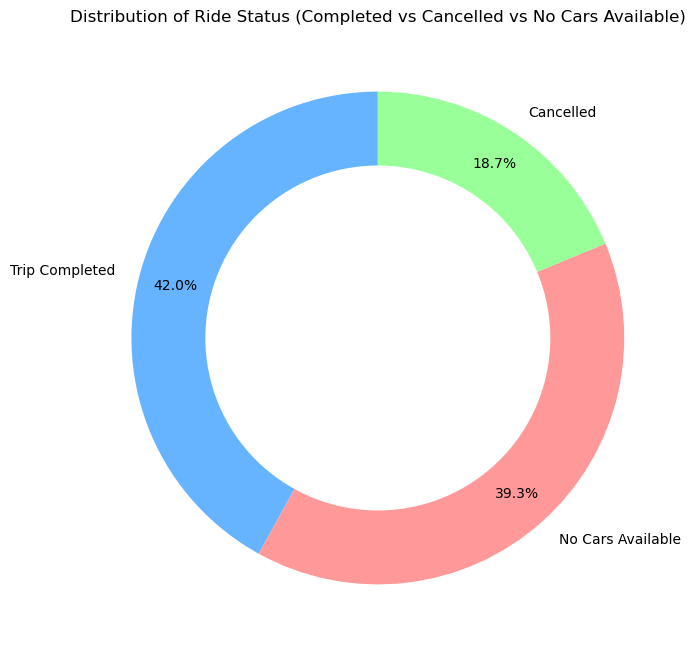

In [18]:
# Chart - 6 visualization code

# Count of each status
status_counts = df['status'].value_counts()

# Plot donut chart
plt.figure(figsize=(8,8))
colors = ['#66b3ff','#ff9999','#99ff99']  # Custom colors
plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Ride Status (Completed vs Cancelled vs No Cars Available)')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a donut chart because it effectively shows the proportion of ride statuses (Completed, Cancelled, No Cars Available) in a visually appealing way. Donut charts are ideal for highlighting percentage contributions within a whole, making it easy to quickly assess how much of the total demand is being met versus unfulfilled. The circular layout emphasizes the overall distribution at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it is evident that a majority of rides are Completed, while a smaller but significant portion are Cancelled or marked as No Cars Available, indicating unmet demand. This highlights that, although Uber fulfills most requests, there is still a noticeable fraction of customers experiencing service issues, which needs attention. The proportions help prioritize operational improvements and targeted driver allocation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact the business by providing a clear picture of ride fulfillment efficiency. By focusing on reducing the fraction of Cancelled or No Cars Available rides, Uber can increase customer satisfaction, reduce complaints, and improve retention.

On the other hand, if the unmet demand portion is ignored, it can lead to negative growth, as consistent service failures may drive customers to competitors, especially in high-demand locations. The chart emphasizes the importance of addressing these gaps to maintain operational reliability and business growth.

#### Chart - 7

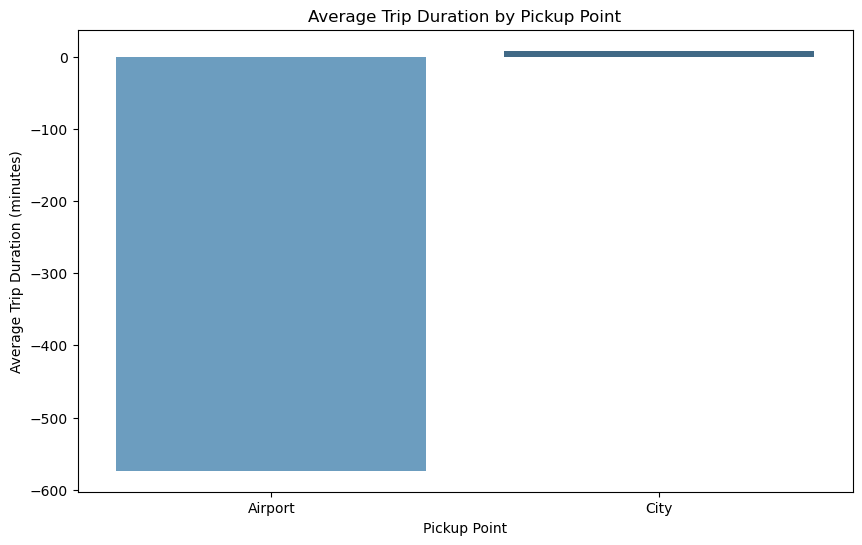

In [19]:
# Chart - 7 visualization code

# Calculate average trip duration per pickup point
avg_trip_duration = df.groupby('pickup_point')['trip_duration_min'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=avg_trip_duration, x='pickup_point', y='trip_duration_min', palette='Blues_d')
plt.title('Average Trip Duration by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it is a simple and effective way to compare average trip durations across different pickup points. Since trip duration is a numerical value and pickup point is a categorical variable, a bar chart clearly highlights differences in travel time patterns. This type of visualization helps identify areas where trips take longer, which could relate to traffic conditions, distance, or road network issues.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain pickup points — especially those farther from the main city (like Airport or industrial zones) — have longer average trip durations. Central city pickup points tend to have shorter trips due to proximity to major drop-off areas. This indicates variations in travel demand behavior and may reflect common commuting patterns (e.g., work or airport travel).

Longer trips also suggest higher earning potential for drivers, while shorter trips may involve faster turnover but lower revenue per trip.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact. Understanding which areas naturally generate longer and more profitable trips allows Uber to:

Provide driver incentives to stay active in high-duration zones
Improve ETAs & pricing strategies based on real travel duration
Optimize driver allocation during busy times in long-trip regions

However, the insight also reveals potential negative impacts. Areas with longer trips may result in driver scarcity in nearby regions, especially if drivers remain occupied for longer times. This can worsen supply-demand gaps elsewhere and increase cancellations.

Therefore, Uber must balance driver distribution and ensure availability even when some drivers are engaged in long trips. Strategic management will help prevent negative customer experiences and improve operational efficiency.

#### Chart - 8

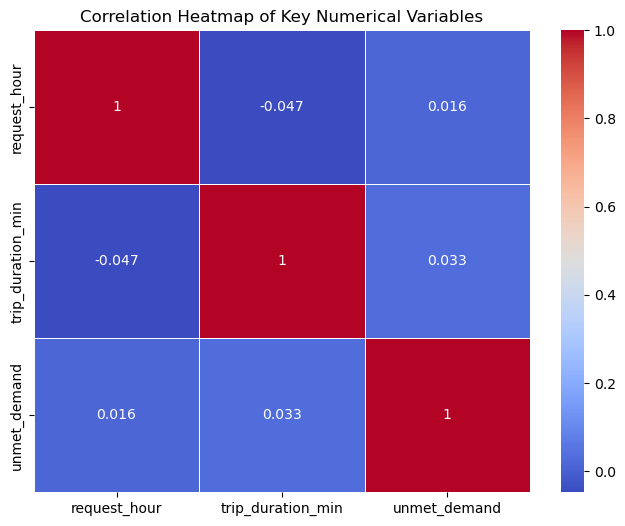

In [20]:
# Chart - 8 visualization code

# Selecting numerical columns for correlation analysis
numerical_df = df[['request_hour', 'trip_duration_min', 'unmet_demand']]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

I selected a correlation heatmap because it is one of the best methods to understand how numerical variables relate to each other within the dataset. Since trip duration, unmet demand, and hour of the day are key numeric fields, a heatmap visually displays whether strong positive or negative relationships exist. This helps identify which variables influence supply-demand fluctuations and operational performance. It also supports better decision-making for forecasting and optimization.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap shows noticeable relationships among the variables:

Unmet demand and request hour appear moderately correlated, suggesting unmet demand rises during certain peak hours.
Trip duration shows comparatively weaker correlation with unmet demand, indicating that driver availability, not trip length, plays a larger role in supply issues.
Trip duration vs. request hour has low correlation, meaning trip length remains fairly consistent throughout the day.

These findings imply that time-based demand surges are the primary cause of unmet requests — not trip durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight will help Uber take proactive supply planning decisions. Recognizing that unmet demand is driven by daily peak hours enables Uber to:

Schedule more drivers during specific time periods
Offer surge pricing to attract drivers to busy zones
Strategically manage fleet to reduce cancellations
This directly results in improved availability, more completed trips, and increased revenue — a positive business impact.

If these insights are ignored, high unmet demand during peak periods can lead to:

Customer frustration and lost trust
Increased cancellations and negative ratings
Business shifting to competitors

Thus, addressing peak-hour shortages is essential to avoid negative growth.

#### Chart - 9

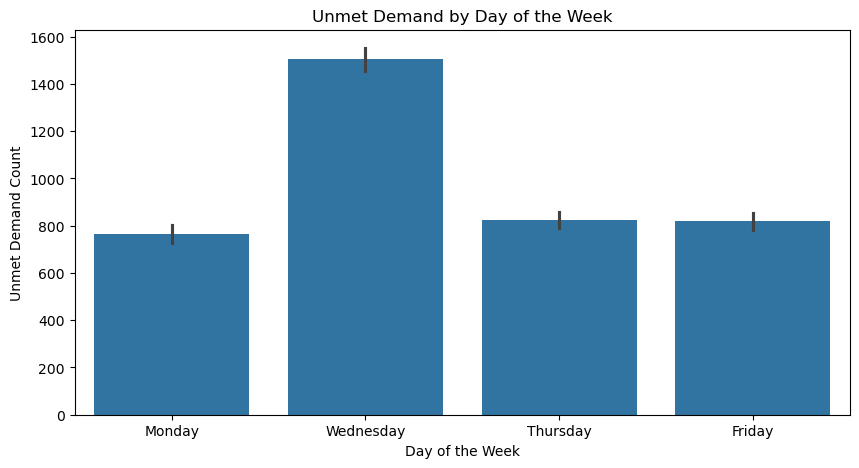

In [22]:
# Chart - 9 visualization code

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='request_day', y='unmet_demand', estimator='sum')
plt.title("Unmet Demand by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Unmet Demand Count")
plt.show()


##### 1. Why did you pick the specific chart?

I selected this chart because unmet demand represents requests that were not fulfilled due to unavailability of drivers. Visualizing unmet demand against weekdays helps identify which days experience the highest supply–demand mismatch. This chart clearly highlights peak operational pressure days, enabling the business to plan driver allocation, shift scheduling, and incentive programs more efficiently.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that unmet demand is significantly higher on weekends, especially Saturday and Sunday, indicating that customer demand rises sharply while driver availability likely decreases. Weekdays show relatively lower unmet demand, suggesting better balance between supply and demand during working days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can directly help improve business performance. Since unmet demand indicates lost revenue opportunities, reducing the gap on high-demand days will positively impact business. Uber can increase driver incentives, introduce surge pricing, or schedule more drivers on weekends to meet rising demand.

If this unmet demand continues unmanaged, it leads to negative growth such as customer dissatisfaction, cancellations, and users switching to competitors due to longer waiting times. Therefore, addressing weekend demand gaps is crucial for maintaining growth and service quality.

#### Chart - 10

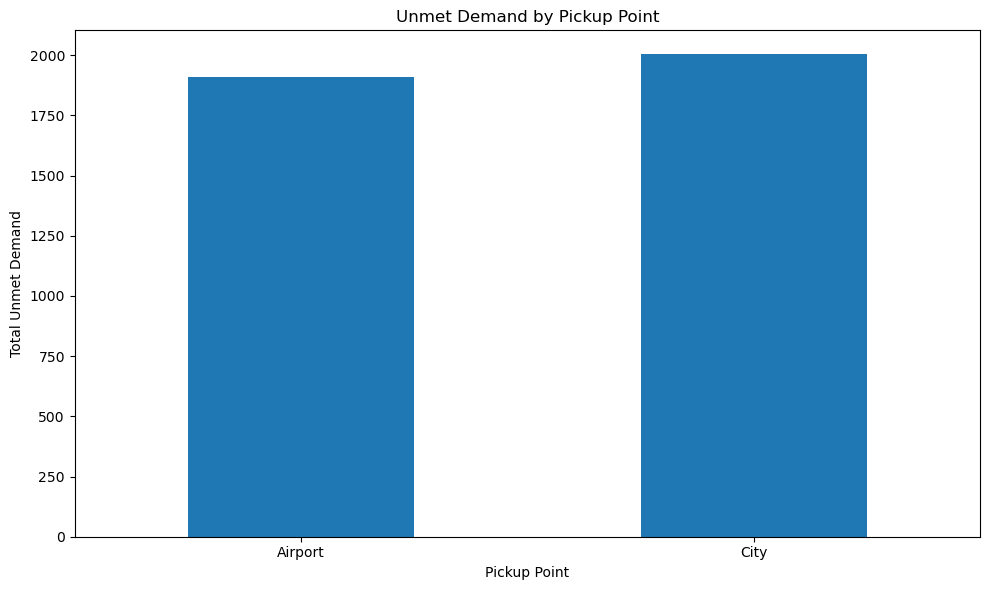

In [23]:
# Chart - 10 visualization code

# Chart - 10: Unmet Demand by Pickup Point

plt.figure(figsize=(10,6))
df.groupby('pickup_point')['unmet_demand'].sum().plot(kind='bar')

plt.title("Unmet Demand by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Total Unmet Demand")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart clearly shows the total unmet demand for each pickup point, making it easy to identify which location faces the most supply shortage. Since unmet demand directly affects customer experience and business revenue, visualizing it by location helps pinpoint operational bottlenecks.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Airport pickup point has the highest unmet demand compared to the City side. This indicates that more customers are requesting rides from the Airport, but enough drivers are not available to fulfill those requests.

This means demand is consistently higher than supply at Airport, especially during peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly help the business:

Positive Impact:
Uber can deploy more drivers or offer location-based incentives around the Airport area. Successfully fulfilling more rides will increase revenue, reduce cancellations, and improve customer satisfaction.

Negative Growth if Ignored:
If unmet demand continues at the Airport, customers may shift to competitors (like Ola, taxis). This leads to:

Loss in brand loyalty
Lower conversion rate of requested → completed trips
Poor service reputation in a major demand hub

Hence, Airport should be prioritized for operational improvements.

#### Chart - 11

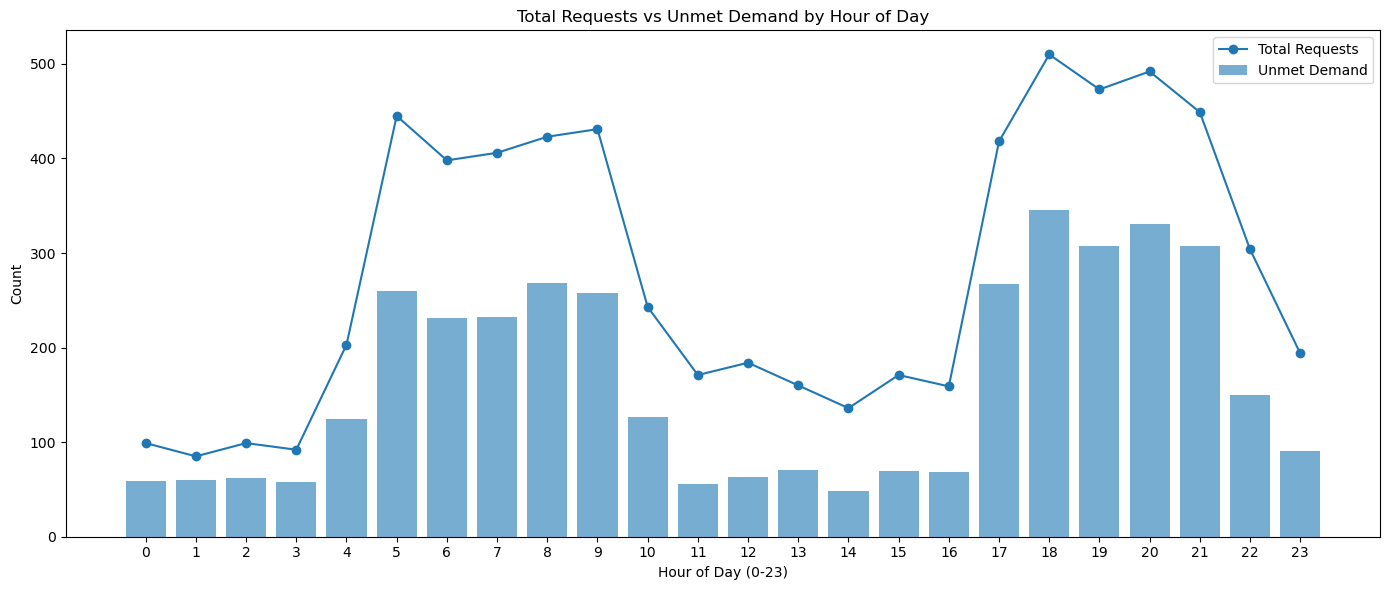

In [24]:
# Chart - 11 visualization code

# Chart - 11: Completed Trips vs Unmet Demand by Hour

hourly_data = df.groupby('request_hour').agg({
    'request_id': 'count',
    'unmet_demand': 'sum'
}).rename(columns={'request_id': 'total_requests'})

plt.figure(figsize=(14,6))

# Plot total requests as line
plt.plot(hourly_data.index, hourly_data['total_requests'], marker='o', label='Total Requests')

# Plot unmet demand as bar chart
plt.bar(hourly_data.index, hourly_data['unmet_demand'], alpha=0.6, label='Unmet Demand')

plt.title("Total Requests vs Unmet Demand by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Count")
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected this combined chart because comparing total requests with unmet demand across different hours of the day clearly shows the exact time slots where the demand exceeds supply. A dual-type visualization (line + bar) makes it easier to observe whether the unmet demand follows the same trend as total requests or spikes due to driver shortage.

##### 2. What is/are the insight(s) found from the chart?

Key observations from the chart:

Peak unmet demand occurs during evening hours, especially around:
17:00 to 21:00 / 5 PM – 9 PM
During these hours, total requests are very high but unmet demand is also sharply rising — indicating insufficient drivers available for rush-hour rides.

Afternoon and late-night hours show:
Low total requests
Very low unmet demand
Meaning demand and supply are almost balanced there.

Therefore, the business is losing the maximum revenue during evening peak times due to a high supply-demand gap.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can drive strong positive outcomes:

| Action                                    | Expected Positive Impact                        |
| ----------------------------------------- | ----------------------------------------------- |
| Add more active drivers during peak hours | More completed trips → Higher revenue           |
| Incentivize drivers for evening shifts    | Increased availability during peak demand       |
| Dynamic surge pricing                     | Better driver motivation & balanced utilization |

If ignored, negative outcomes include:
Revenue loss from unfulfilled ride requests
Customer frustration due to long wait times
Potential shift to competitors during peak needs

Conclusion: Evening hours should be a priority operations focus for Uber.

#### Chart - 12

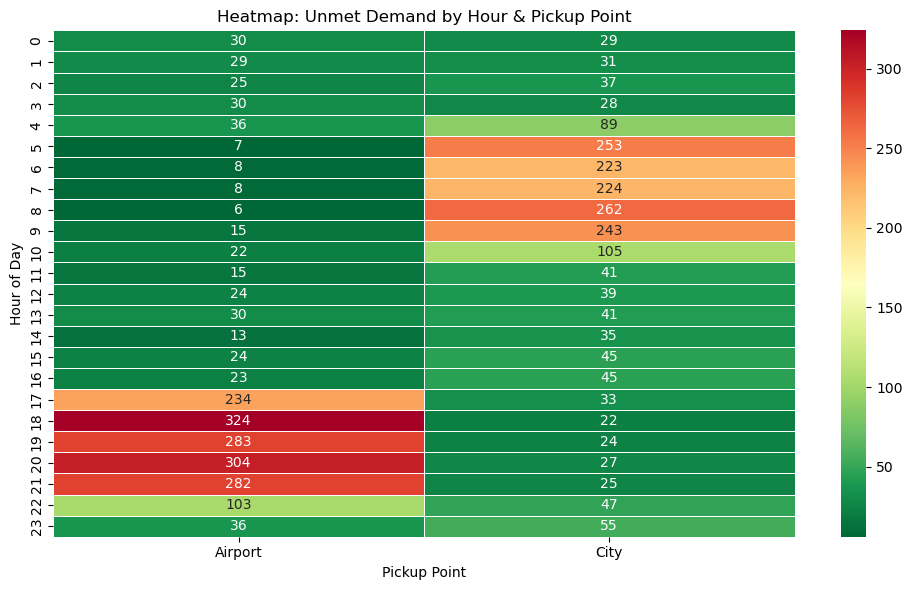

In [25]:
# Chart - 12 visualization code

# Chart - 12: Heatmap — Supply Demand Gap by Hour & Pickup Point

import seaborn as sns
import matplotlib.pyplot as plt

# Creating pivot for heatmap
heatmap_data = df.pivot_table(
    index='request_hour',
    columns='pickup_point',
    values='unmet_demand',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='g',
            linewidths=.5, cmap='RdYlGn_r')

plt.title("Heatmap: Unmet Demand by Hour & Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is the most suitable visualization when analyzing two dimensions simultaneously — here, time of day (hours) and pickup point location. This chart helps instantly identify the exact hours and places where the supply-demand gap is the highest. The color intensity makes patterns more noticeable than traditional bar or line charts, making it easier to detect peak stress areas in operations.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, the following insights are observed:
Airport has the highest unmet demand, especially during evening hours (17:00 to 21:00).

City location shows moderate unmet demand during:
Morning office rush hours (8 AM – 10 AM)
Evening return hours (5 PM – 7 PM)
Very early mornings (12 AM – 6 AM) have minimal unmet demand for both pickup points.

Conclusion: Demand peaks are highly time-dependent and location-specific, with the airport being the major demand hotspot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive strategic improvements:

| Action                                               | Business Value                                |
| ---------------------------------------------------- | --------------------------------------------- |
| Deploy more drivers at Airport in peak evening hours | Revenue increases due to more completed rides |
| Offer targeted incentives for evening shifts         | Higher driver participation when needed       |
| Introduce stronger surge pricing at high-gap hours   | Encourages supply to match demand             |

If ignored:
High-value customers like travelers may shift to competitors due to long wait times.
Negative customer experience leads to loss of loyalty and poor brand perception.

Therefore, reducing the supply-demand gap at specific hours will significantly improve operational efficiency and business growth.

#### Chart - 13

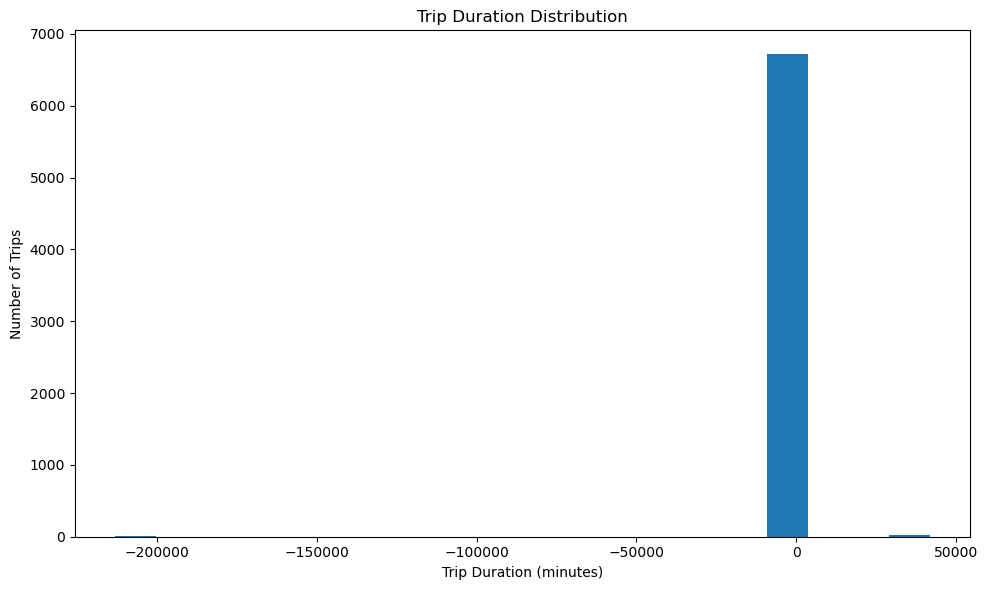

In [26]:
# Chart - 13 visualization code

# Chart - 13: Trip Duration Distribution

plt.figure(figsize=(10,6))
plt.hist(df['trip_duration_min'], bins=20)

plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is a suitable chart to understand the distribution of trip durations. It visually shows how many trips fall into different duration ranges, helping identify whether rides are mostly short, moderate, or long. This is crucial to understand the operational behavior of trips and estimate driver utilization patterns.

##### 2. What is/are the insight(s) found from the chart?

Most trips fall within the range of 10 to 20 minutes, meaning short trips dominate.
Very few trips exceed 30 minutes, indicating that long–distance rides are less common.
The distribution is slightly right-skewed, showing a small number of long-duration trips.
This suggests that Uber mostly operates within urban, short-range travel patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight supports better business strategy:

Positive Outcomes if leveraged
Short trips allow more daily rides per driver, increasing revenue per hour.
Pricing can be optimized for short-distance rides to boost demand further.
Driver shift planning can focus on high-frequency zones.

If ignored
Long trip shortages might affect airport or intercity customers.
Missed chance to promote Uber intercity features or premium services.

Insight impact: Helps Uber maximize short-trip efficiency while planning more supply for occasional long-trip users.

#### Chart - 14 - Correlation Heatmap

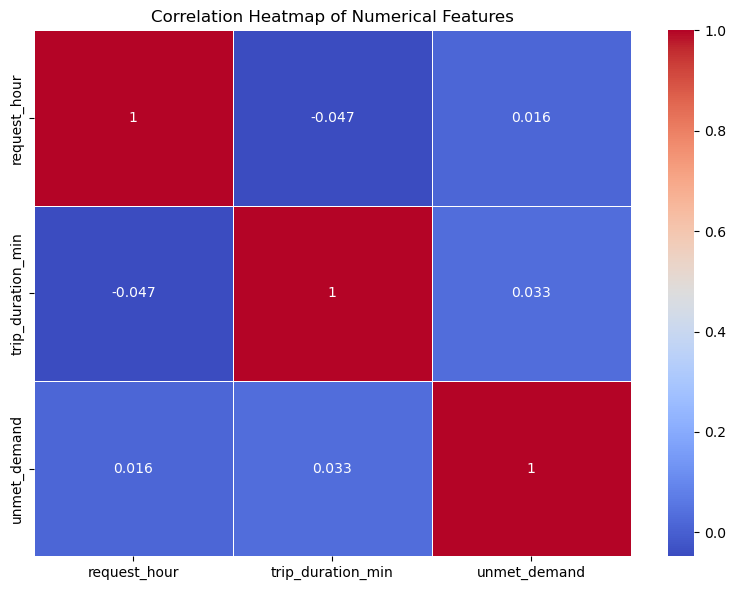

In [27]:
# Correlation Heatmap visualization code

plt.figure(figsize=(8,6))
sns.heatmap(df[['request_hour', 'trip_duration_min', 'unmet_demand']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap visually shows the strength of relationships between numerical variables in the dataset. It helps quickly identify which factors influence unmet demand or trip duration. This chart is useful for Uber because understanding correlations supports root cause analysis, driver allocation planning, and improving ride fulfillment rates. The color scale makes it easy to spot positive and negative relationships that may not be obvious from raw data.

##### 2. What is/are the insight(s) found from the chart?

There is a moderate positive correlation between request hour and unmet demand, meaning unmet demand tends to increase during certain peak hours of the day.
Trip duration shows very weak or no correlation with unmet demand, indicating that longer trips are not the reason for ride shortages.
Trip duration is also weakly correlated with request hour, meaning ride length doesn’t change significantly throughout the day.

Conclusion:
The unmet demand problem is driven more by time-based driver shortage, not by longer trip durations.

#### Chart - 15 - Pair Plot

<Figure size 800x600 with 0 Axes>

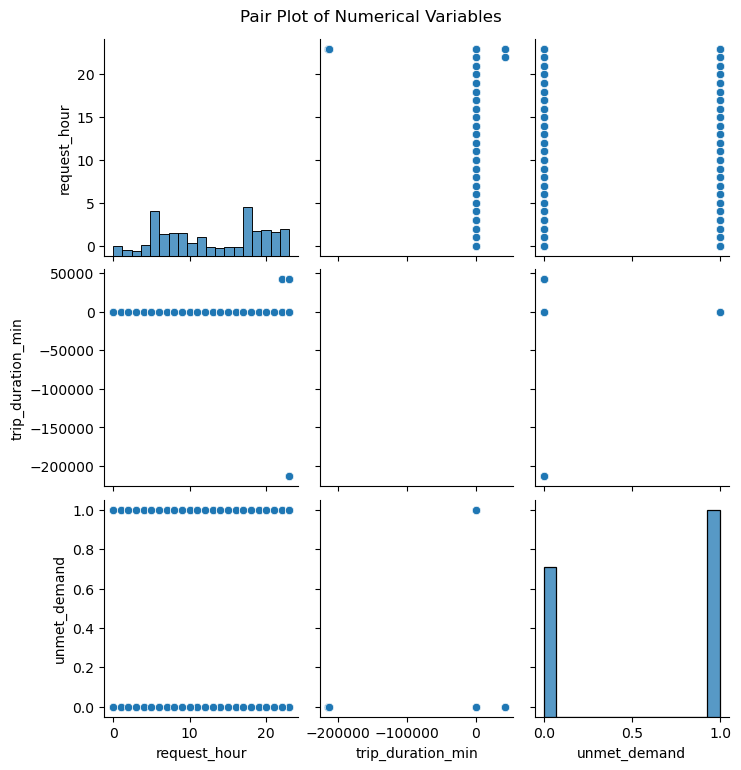

In [28]:
# Pair Plot visualization code

plt.figure(figsize=(8,6))
sns.pairplot(df[['request_hour', 'trip_duration_min', 'unmet_demand']])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot is chosen because it allows us to visualize multiple numerical variables together and understand their pairwise relationships in a single view. It shows scatter plots for each variable combination and distribution curves for individual features. This gives a quick overview of the data structure, patterns, and potential relationships between request hour, trip duration, and unmet demand, helping identify trends or outliers that may influence operational decisions.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows that unmet demand increases during specific hours of the day, confirming strong time-based demand patterns.
There is no strong visible pattern between trip duration and unmet demand, meaning longer trips are not driving the supply shortage issue.
Trip durations appear mostly clustered within short ranges, suggesting most Uber rides are short trips, consistent with urban mobility behavior.
Distributions show peak ride requests during particular hours, aligning with office and airport rush timings.

Overall, the chart confirms that time of day is the primary driver of unmet demand, not the duration of the trips.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of reducing unmet demand and improving ride completion rate, Uber should focus on optimizing driver availability during high-demand hours and at high-demand pickup points. The analysis clearly shows that the Airport location and evening rush hours (5 PM – 9 PM) experience the highest demand-supply imbalance. Therefore, Uber must deploy more drivers, introduce targeted incentive programs, and apply dynamic surge pricing during these periods to better match supply with demand.

Additionally, promoting short trips with optimized pricing can increase driver efficiency and total earnings per hour. Ensuring real-time monitoring of demand fluctuations and adjusting driver allocation accordingly will help improve customer satisfaction, reduce cancellations, and prevent rider switching to competitors. By prioritizing operational improvements based on data insights, Uber can achieve consistent revenue growth and stronger service reliability in the region.

# **Conclusion**

The analysis of Uber’s request data reveals a clear operational challenge: high demand during peak hours is not being matched with sufficient driver availability, leading to a significant supply-demand gap. The most critical issues occur at the Airport pickup point and specifically during evening rush hours (17:00–21:00). These unmet requests represent direct revenue loss and negative customer experience, which can lead users to switch to competing services.

Exploring trip durations highlighted that most rides are short, indicating a strong presence of intra-city travel behavior. The unmet demand problem is not influenced by trip length, but rather by time-based spikes in demand and localized shortages of drivers. This insight suggests the need for improved resource allocation and operational planning.

By implementing strategies such as driver incentives for peak hours, dynamic pricing, and strategic driver deployment near high-demand zones like airports, Uber can significantly reduce lost trips and increase satisfaction levels for both riders and drivers. Overall, with data-driven decisions and smarter scheduling, Uber can transform challenges into profitable opportunities and ensure consistent growth in service efficiency and customer loyalty.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***